## XOR with Neural Networks 

| X1 | X2 | y = X1 XOR X2 |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |




In [1]:
import random
import math
import matplotlib.pyplot as plt

In [20]:
#Input matrix X
X = [[0,0],[0,1],[1,0],[1,1]]

#Output vector y
y = [[0],[1],[1],[0]]


In [10]:
# Defino funcion sigmoid
def sigmoid(Z): # Z es la matriz de Zi
    Z= 1/(1+ math.exp(-Z))
    return Z

In [23]:

def SGD(X,y, n_epochs=100, alpha=0.01):
    n_epochs = n_epochs
    alpha = alpha
    # Paso 1 - Inicializar w y b con distribución U(0,1) e hiperparámetros
    w11_1 = random.uniform(0,20) 
    w12_1 = random.uniform(0,20)
    w21_1 = random.uniform(0,20) 
    w22_1 = random.uniform(0,20)
    b1_1 = random.uniform(0,20)
    b2_1 = random.uniform(0,20)
    w11_2 = random.uniform(0,20)
    w12_2 = random.uniform(0,20)
    b1_2 = random.uniform(0,20)
    
    #Z_1 = np.zeros((4,2))
    Z_1 = [[0,0], [0,0], [0,0], [0,0]]
    Z_2 = [[0],[0],[0],[0]]
    A_1 = [[0,0], [0,0], [0,0], [0,0]]
    y_pred = [[0],[0],[0],[0]]
    MSE=[] # Acá voy ir guardando los MSE para cada Epoch


    for epoch in range(n_epochs):
        err = [[0],[0],[0],[0]]
        err_2 = 0
        for i in range(len(X)): 
            
            # Step1: Forward Propagation
            Z_1[i][0] = w11_1 * X[i][0] + w12_1 * X[i][1] + b1_1
            Z_1[i][1] = w21_1 * X[i][0] + w22_1 * X[i][1] + b2_1
            
            A_1[i][0] = sigmoid(Z_1[i][0])
            A_1[i][1] = sigmoid(Z_1[i][1])
            Z_2[i][0] = w11_2 * A_1[i][0] + w12_2 * A_1[i][1] + b2_1
            
            # Step2: Loss function
            y_pred[i][0]=Z_2[i][0]
            err[i][0]=(y[i][0] - y_pred[i][0])
            err_2 += (err[i][0])**2

            #Step 3: Backpropagation

            #Derivadas parámetros Layer2
            dw11_2 = -2 * err[i][0] * A_1[i][0]
            dw12_2 = -2 * err[i][0] * A_1[i][1]
            db1_2 = -2 * (err[i][0])

            #Derivadas parámetros Layer2
            dw11_1 = -2 * err[i][0] * w11_2 * sigmoid(Z_1[i][0]) * (1 - sigmoid(Z_1[i][0])) * X[i][0]
            dw12_1 = -2 * err[i][0] * w11_2 * sigmoid(Z_1[i][0]) * (1 - sigmoid(Z_1[i][0])) * X[i][1]
            db1_1 = -2 * err[i][0] * w11_2 * sigmoid(Z_1[i][0]) * (1 - sigmoid(Z_1[i][0]))
            dw21_1 = -2 * err[i][0] * w12_2 * sigmoid(Z_1[i][1]) * (1 - sigmoid(Z_1[i][1])) * X[i][0]
            dw22_1 = -2 * err[i][0] * w12_2 * sigmoid(Z_1[i][1]) * (1 - sigmoid(Z_1[i][1])) * X[i][1]
            db2_1 = -2 * err[i][0] * w12_2 * sigmoid(Z_1[i][1]) * (1 - sigmoid(Z_1[i][1]))

            #Step4: Actualización de los pesos
            
            #Layer 2 
            w11_2 -= alpha * dw11_2
            w12_2 -= alpha * dw12_2
            b1_2 -= alpha * db1_2
            #Layer 1
            w11_1 -=  alpha * dw11_1
            w12_1 -= alpha * dw12_1
            b1_1 -= alpha * db1_1
            w21_1 -=  alpha * dw21_1
            w22_1 -= alpha * dw22_1
            b2_1 -= alpha * db2_1
           
        MSE.append(err_2/4) # Luego graficar MSE vs Epochs
    return MSE

In [24]:
#Pruebo con n_epochs=100 y alpha=0.01)
MSE = SGD(X,y,n_epochs=100, alpha=0.01)

Text(0, 0.5, 'MSE')

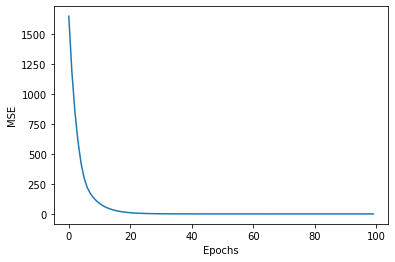

In [19]:
# Grafico MSE en función de las Epochs
plt.plot(MSE)
plt.xlabel("Epochs")
plt.ylabel("MSE")